First data set: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE81076
Second data set: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE85241

How are we going to define our batches? 

-For the first data set, we can define batches by the organ donors --> donors 2, 3, 7, 10, 17 (5 different batches)
-For the second data set, we can define batches by the organ donors --> donors 28, 29, 30, and 31

-The cells studied for the organ donors in the second data set are consistent (8 libraries of cells for each donor), whereas the cells studied for the organ donors in the first data set are inconsistent (different cell types, different number of libraries of cells studied).

Loading the necessary packages 

In [1]:
import pandas as pd
import sklearn # scikit learn package will be very helpful
import numpy as np

from sklearn.decomposition import PCA  # for PCA
import matplotlib.pyplot as plt  # for plotting variance thresholds to pick the number of principal components to do the PCA with
%matplotlib inline

from sklearn.neighbors import NearestNeighbors  # for finding nearest neighbors between two data sets

Reading in the data sets 

In [2]:
# reading in the first pancreas data set

pancreas_data = pd.read_table("GSE81076_D2_3_7_10_17.txt")  
pancreas_data

,Unnamed: 0,D2ex_1,D2ex_2,D2ex_3,D2ex_4,D2ex_5,D2ex_6,D2ex_7,D2ex_8,D2ex_9,...,D17TGFB_87,D17TGFB_88,D17TGFB_89,D17TGFB_90,D17TGFB_91,D17TGFB_92,D17TGFB_93,D17TGFB_94,D17TGFB_95,D17TGFB_96
0,A1BG-AS1__chr19,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,A1BG__chr19,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.001958,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,A1CF__chr10,0.000000,2.007853,1.001958,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.001958,0.000000,0.000000,1.001958,1.001958,1.001958,1.001958,0.000000,0.0
3,A2M-AS1__chr12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,A2ML1__chr12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.007853,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20143,ZYG11A__chr1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
20144,ZYG11B__chr1,0.000000,1.001958,0.000000,5.049473,1.001958,1.001958,1.001958,1.001958,0.000000,...,1.001958,1.001958,2.007853,0.000000,0.000000,1.001958,1.001958,1.001958,1.001958,0.0
20145,ZYX__chr7,1.001958,0.000000,3.017717,2.007853,0.000000,4.031579,0.000000,1.001958,2.007853,...,7.097484,4.031579,0.000000,1.001958,1.001958,0.000000,0.000000,0.000000,1.001958,0.0
20146,ZZEF1__chr17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.001958,0.000000,...,0.000000,0.000000,1.001958,0.000000,0.000000,1.001958,0.000000,0.000000,0.000000,0.0


In [33]:
# reading in the second pancreas data set - gene names are already the row names here

pancreas_data_2 = pd.read_table("GSE85241_cellsystems_dataset_4donors_updated.csv")  
pancreas_data_2

,D28-1_1,D28-1_2,D28-1_3,D28-1_4,D28-1_5,D28-1_6,D28-1_7,D28-1_8,D28-1_9,D28-1_10,...,D30-8_87,D30-8_88,D30-8_89,D30-8_90,D30-8_91,D30-8_92,D30-8_93,D30-8_94,D30-8_95,D30-8_96
A1BG-AS1__chr19,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
A1BG__chr19,0.000000,0.000000,1.001958,1.001958,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.007853,0.0,0.0
A1CF__chr10,6.071431,0.000000,2.007853,6.071431,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,1.001958,7.097484,3.017717,0.000000,3.017717,0.000000,0.000000,0.0,0.0
A2M-AS1__chr12,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,2.007853,0.000000,1.001958,0.000000,0.000000,0.000000,0.0,0.0
A2ML1__chr12,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A__chr1,0.000000,0.000000,0.000000,1.001958,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
ZYG11B__chr1,2.007853,6.071431,1.001958,6.071431,3.017717,0.0,0.0,0.0,0.0,0.0,...,9.162012,2.007853,2.007853,1.001958,4.031579,2.007853,3.017717,9.162012,0.0,0.0
ZYX__chr7,0.000000,5.049473,0.000000,1.001958,0.000000,0.0,0.0,0.0,0.0,0.0,...,3.017717,0.000000,0.000000,0.000000,0.000000,1.001958,8.127667,5.049473,0.0,0.0
ZZEF1__chr17,0.000000,4.031579,1.001958,3.017717,0.000000,0.0,0.0,0.0,0.0,0.0,...,2.007853,0.000000,1.001958,0.000000,4.031579,0.000000,2.007853,3.017717,0.0,0.0


Modifying the data sets to the needed formats

In [3]:
# setting the gene names as the row names

pancreas_data = pancreas_data.rename(columns = {"Unnamed: 0":"Genes"}) 
pancreas_data.set_index(["Genes"], inplace = True)
pancreas_data

,D2ex_1,D2ex_2,D2ex_3,D2ex_4,D2ex_5,D2ex_6,D2ex_7,D2ex_8,D2ex_9,D2ex_10,...,D17TGFB_87,D17TGFB_88,D17TGFB_89,D17TGFB_90,D17TGFB_91,D17TGFB_92,D17TGFB_93,D17TGFB_94,D17TGFB_95,D17TGFB_96
Genes,,,,,,,,,,,,,,,,,,,,,
A1BG-AS1__chr19,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
A1BG__chr19,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,1.001958,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
A1CF__chr10,0.000000,2.007853,1.001958,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,1.001958,0.000000,0.000000,1.001958,1.001958,1.001958,1.001958,0.000000,0.0
A2M-AS1__chr12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
A2ML1__chr12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.007853,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A__chr1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
ZYG11B__chr1,0.000000,1.001958,0.000000,5.049473,1.001958,1.001958,1.001958,1.001958,0.000000,0.0,...,1.001958,1.001958,2.007853,0.000000,0.000000,1.001958,1.001958,1.001958,1.001958,0.0
ZYX__chr7,1.001958,0.000000,3.017717,2.007853,0.000000,4.031579,0.000000,1.001958,2.007853,0.0,...,7.097484,4.031579,0.000000,1.001958,1.001958,0.000000,0.000000,0.000000,1.001958,0.0


Cosine normalization

In [4]:
# for cosine normalization

from sklearn.preprocessing import Normalizer



In [5]:
# cosine normalization of first pancreas data set - gets rid of row names and column names though...

transformer = Normalizer().fit(pancreas_data)
pancreas_data_cnorm = pd.DataFrame(transformer.transform(pancreas_data))
pancreas_data_cnorm

,0,1,2,3,4,5,6,7,8,9,...,1718,1719,1720,1721,1722,1723,1724,1725,1726,1727
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.033422,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.000000,0.066485,0.033177,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.033177,0.000000,0.000000,0.033177,0.033177,0.033177,0.033177,0.000000,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.121129,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
20144,0.000000,0.007053,0.000000,0.035542,0.007053,0.007053,0.007053,0.007053,0.000000,0.0,...,0.007053,0.007053,0.014133,0.000000,0.000000,0.007053,0.007053,0.007053,0.007053,0.0
20145,0.013294,0.000000,0.040040,0.026641,0.000000,0.053492,0.000000,0.013294,0.026641,0.0,...,0.094171,0.053492,0.000000,0.013294,0.013294,0.000000,0.000000,0.000000,0.013294,0.0
20146,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.042107,0.000000,0.0,...,0.000000,0.000000,0.042107,0.000000,0.000000,0.042107,0.000000,0.000000,0.000000,0.0


In [6]:
# function adapted from HW1 - cosine normalization 

def normalizing_cells_MaxAbsScaler(data):
    
    """
        input data: data frame with gene expression data  
            columns are the cells and rows are genes
        output data_normalized_data_values: normalized (scaled) data
        function:  dividing the value of each gene for each cell 
                by the maximum value of that cell.
    """
    import sklearn.preprocessing
    
    # creating the list of patients
    cells = data.columns.values
    
    #using Sklearn to scale the data 
    scaler = sklearn.preprocessing.MaxAbsScaler()
    data_scaled = scaler.fit_transform(data)
    
    #creating the dataframe, the output of sklearn MaxAbsScaler is an array
    data_normalized_data_values = pd.DataFrame(data_scaled, columns= cells, index = data.index)
      
    return data_normalized_data_values

In [7]:
# cosine normalization here keeps the gene and cell names in the rows and columns

normalized_pancreas = normalizing_cells_MaxAbsScaler(pancreas_data)
normalized_pancreas

,D2ex_1,D2ex_2,D2ex_3,D2ex_4,D2ex_5,D2ex_6,D2ex_7,D2ex_8,D2ex_9,D2ex_10,...,D17TGFB_87,D17TGFB_88,D17TGFB_89,D17TGFB_90,D17TGFB_91,D17TGFB_92,D17TGFB_93,D17TGFB_94,D17TGFB_95,D17TGFB_96
Genes,,,,,,,,,,,,,,,,,,,,,
A1BG-AS1__chr19,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0
A1BG__chr19,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.0,...,0.000000,0.005776,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0
A1CF__chr10,0.000000,0.001993,0.000941,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.0,...,0.000000,0.005776,0.000000,0.000000,0.00088,0.00088,0.000627,0.001313,0.000000,0.0
A2M-AS1__chr12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0
A2ML1__chr12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.002632,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A__chr1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0
ZYG11B__chr1,0.000000,0.000994,0.000000,0.038319,0.012049,0.007604,0.008911,0.01077,0.00000,0.0,...,0.005340,0.005776,0.001257,0.000000,0.00000,0.00088,0.000627,0.001313,0.000941,0.0
ZYX__chr7,0.003588,0.000000,0.002834,0.015237,0.000000,0.030595,0.000000,0.01077,0.01070,0.0,...,0.037824,0.023240,0.000000,0.001595,0.00088,0.00000,0.000000,0.000000,0.000941,0.0


In [35]:
# cosine normalization for the second pancreas data set - gets rid of row names and column names though...

#transformer = Normalizer().fit(pancreas_data_2)
#pancreas_data_2_cnorm = pd.DataFrame(transformer.transform(pancreas_data_2))
#pancreas_data_2_cnorm

# cosine normalization here keeps the gene and cell names in the rows and columns

normalized_pancreas_2 = normalizing_cells_MaxAbsScaler(pancreas_data_2)
normalized_pancreas_2

,D28-1_1,D28-1_2,D28-1_3,D28-1_4,D28-1_5,D28-1_6,D28-1_7,D28-1_8,D28-1_9,D28-1_10,...,D30-8_87,D30-8_88,D30-8_89,D30-8_90,D30-8_91,D30-8_92,D30-8_93,D30-8_94,D30-8_95,D30-8_96
A1BG-AS1__chr19,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
A1BG__chr19,0.000000,0.000000,0.000627,0.001043,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002492,0.0,0.0
A1CF__chr10,0.003802,0.000000,0.001257,0.006319,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000627,0.004444,0.002429,0.000000,0.001890,0.000000,0.000000,0.0,0.0
A2M-AS1__chr12,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.001257,0.000000,0.001505,0.000000,0.000000,0.000000,0.0,0.0
A2ML1__chr12,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A__chr1,0.000000,0.000000,0.000000,0.001043,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
ZYG11B__chr1,0.001257,0.007314,0.000627,0.006319,0.011157,0.0,0.0,0.0,0.0,0.0,...,0.016433,0.001257,0.001257,0.000807,0.006055,0.001257,0.005413,0.011371,0.0,0.0
ZYX__chr7,0.000000,0.006083,0.000000,0.001043,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.005413,0.000000,0.000000,0.000000,0.000000,0.000627,0.014578,0.006267,0.0,0.0
ZZEF1__chr17,0.000000,0.004857,0.000627,0.003141,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.003601,0.000000,0.000627,0.000000,0.006055,0.000000,0.003601,0.003745,0.0,0.0


Adding a batch variable to the data sets 

In [32]:
normalized_pancreas_t= normalized_pancreas.transpose()
x = np.array(["1"])
normalized_pancreas_t['batch'] = np.repeat(x, [1728])
normalized_pancreas_t

Genes,A1BG-AS1__chr19,A1BG__chr19,A1CF__chr10,A2M-AS1__chr12,A2ML1__chr12,A2MP1__chr12,A2M__chr12,A4GALT__chr22,A4GNT__chr3,AAAS__chr12,...,ZWINT__chr10,ZXDA__chrX,ZXDB__chrX,ZXDC__chr3,ZYG11A__chr1,ZYG11B__chr1,ZYX__chr7,ZZEF1__chr17,ZZZ3__chr1,batch
D2ex_1,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.003588,0.00000,0.0,1
D2ex_2,0.0,0.0,0.001993,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000994,0.0,0.000994,0.000000,0.00000,0.0,1
D2ex_3,0.0,0.0,0.000941,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000941,0.0,0.000000,0.002834,0.00000,0.0,1
D2ex_4,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.007604,0.007604,0.0,0.038319,0.015237,0.00000,0.0,1
D2ex_5,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.012049,0.0,0.012049,0.000000,0.00000,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D17TGFB_92,0.0,0.0,0.000880,0.0,0.000000,0.0,0.0,0.0,0.0,0.000880,...,0.0,0.0,0.000000,0.000880,0.0,0.000880,0.000000,0.00088,0.0,1
D17TGFB_93,0.0,0.0,0.000627,0.0,0.000000,0.0,0.0,0.0,0.0,0.000627,...,0.0,0.0,0.000000,0.000627,0.0,0.000627,0.000000,0.00000,0.0,1
D17TGFB_94,0.0,0.0,0.001313,0.0,0.002632,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.001313,0.0,0.001313,0.000000,0.00000,0.0,1
D17TGFB_95,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000941,...,0.0,0.0,0.000000,0.000941,0.0,0.000941,0.000941,0.00000,0.0,1


In [36]:
normalized_pancreas_2_t= normalized_pancreas_2.transpose()
y = np.array(["2"])
normalized_pancreas_2_t['batch'] = np.repeat(y, [3072])
normalized_pancreas_2_t

,A1BG-AS1__chr19,A1BG__chr19,A1CF__chr10,A2M-AS1__chr12,A2ML1__chr12,A2M__chr12,A4GALT__chr22,A4GNT__chr3,AAAS__chr12,AACSP1__chr5,...,ZWINT__chr10,ZXDA__chrX,ZXDB__chrX,ZXDC__chr3,ZYG11A__chr1,ZYG11B__chr1,ZYX__chr7,ZZEF1__chr17,ZZZ3__chr1,batch
D28-1_1,0.0,0.000000,0.003802,0.0,0.0,0.000000,0.000000,0.0,0.000627,0.0,...,0.0,0.000000,0.000627,0.003162,0.000000,0.001257,0.000000,0.000000,0.000000,2
D28-1_2,0.0,0.000000,0.000000,0.0,0.0,0.006083,0.001207,0.0,0.000000,0.0,...,0.0,0.000000,0.001207,0.011037,0.000000,0.007314,0.006083,0.004857,0.001207,2
D28-1_3,0.0,0.000627,0.001257,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.000627,0.000000,0.000627,0.000000,0.000627,0.000000,0.000627,0.000000,2
D28-1_4,0.0,0.001043,0.006319,0.0,0.0,0.000000,0.000000,0.0,0.001043,0.0,...,0.0,0.000000,0.002090,0.010616,0.001043,0.006319,0.001043,0.003141,0.002090,2
D28-1_5,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.011157,0.000000,0.011157,0.000000,0.000000,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D30-8_92,0.0,0.000000,0.001890,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.000627,0.000627,0.004444,0.000000,0.001257,0.000627,0.000000,0.000627,2
D30-8_93,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.001797,0.0,...,0.0,0.000000,0.000000,0.001797,0.000000,0.005413,0.014578,0.003601,0.000000,2
D30-8_94,0.0,0.002492,0.000000,0.0,0.0,0.008809,0.001244,0.0,0.001244,0.0,...,0.0,0.000000,0.002492,0.010088,0.000000,0.011371,0.006267,0.003745,0.000000,2
D30-8_95,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2


Dropping any missing values from the transposed data sets 

In [34]:
# dropping missing values - looks like there aren't any here

normalized_pancreas_t.dropna(axis=1) 
normalized_pancreas_t

Genes,A1BG-AS1__chr19,A1BG__chr19,A1CF__chr10,A2M-AS1__chr12,A2ML1__chr12,A2MP1__chr12,A2M__chr12,A4GALT__chr22,A4GNT__chr3,AAAS__chr12,...,ZWINT__chr10,ZXDA__chrX,ZXDB__chrX,ZXDC__chr3,ZYG11A__chr1,ZYG11B__chr1,ZYX__chr7,ZZEF1__chr17,ZZZ3__chr1,batch
D2ex_1,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.003588,0.00000,0.0,1
D2ex_2,0.0,0.0,0.001993,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000994,0.0,0.000994,0.000000,0.00000,0.0,1
D2ex_3,0.0,0.0,0.000941,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000941,0.0,0.000000,0.002834,0.00000,0.0,1
D2ex_4,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.007604,0.007604,0.0,0.038319,0.015237,0.00000,0.0,1
D2ex_5,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.012049,0.0,0.012049,0.000000,0.00000,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D17TGFB_92,0.0,0.0,0.000880,0.0,0.000000,0.0,0.0,0.0,0.0,0.000880,...,0.0,0.0,0.000000,0.000880,0.0,0.000880,0.000000,0.00088,0.0,1
D17TGFB_93,0.0,0.0,0.000627,0.0,0.000000,0.0,0.0,0.0,0.0,0.000627,...,0.0,0.0,0.000000,0.000627,0.0,0.000627,0.000000,0.00000,0.0,1
D17TGFB_94,0.0,0.0,0.001313,0.0,0.002632,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.001313,0.0,0.001313,0.000000,0.00000,0.0,1
D17TGFB_95,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000941,...,0.0,0.0,0.000000,0.000941,0.0,0.000941,0.000941,0.00000,0.0,1


In [37]:
# dropping missing values - looks like there aren't any here

normalized_pancreas_2_t.dropna(axis=1) 
normalized_pancreas_2_t

,A1BG-AS1__chr19,A1BG__chr19,A1CF__chr10,A2M-AS1__chr12,A2ML1__chr12,A2M__chr12,A4GALT__chr22,A4GNT__chr3,AAAS__chr12,AACSP1__chr5,...,ZWINT__chr10,ZXDA__chrX,ZXDB__chrX,ZXDC__chr3,ZYG11A__chr1,ZYG11B__chr1,ZYX__chr7,ZZEF1__chr17,ZZZ3__chr1,batch
D28-1_1,0.0,0.000000,0.003802,0.0,0.0,0.000000,0.000000,0.0,0.000627,0.0,...,0.0,0.000000,0.000627,0.003162,0.000000,0.001257,0.000000,0.000000,0.000000,2
D28-1_2,0.0,0.000000,0.000000,0.0,0.0,0.006083,0.001207,0.0,0.000000,0.0,...,0.0,0.000000,0.001207,0.011037,0.000000,0.007314,0.006083,0.004857,0.001207,2
D28-1_3,0.0,0.000627,0.001257,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.000627,0.000000,0.000627,0.000000,0.000627,0.000000,0.000627,0.000000,2
D28-1_4,0.0,0.001043,0.006319,0.0,0.0,0.000000,0.000000,0.0,0.001043,0.0,...,0.0,0.000000,0.002090,0.010616,0.001043,0.006319,0.001043,0.003141,0.002090,2
D28-1_5,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.011157,0.000000,0.011157,0.000000,0.000000,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D30-8_92,0.0,0.000000,0.001890,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.000627,0.000627,0.004444,0.000000,0.001257,0.000627,0.000000,0.000627,2
D30-8_93,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.001797,0.0,...,0.0,0.000000,0.000000,0.001797,0.000000,0.005413,0.014578,0.003601,0.000000,2
D30-8_94,0.0,0.002492,0.000000,0.0,0.0,0.008809,0.001244,0.0,0.001244,0.0,...,0.0,0.000000,0.002492,0.010088,0.000000,0.011371,0.006267,0.003745,0.000000,2
D30-8_95,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2


Merging the two data sets since the PCA is performed on the merged data set with all the batches

In [ ]:
#normalized_pancreas_t_merged = pd.normalized_pancreas_t.merge(normalized_pancreas_2_t) --> ??

normalized_pancreas_t_merged = pd.merge(normalized_pancreas_t, normalized_pancreas_2_t, ignore_index = True, sort = False, axis = 0)
#normalized_pancreas_t_merged

PCA

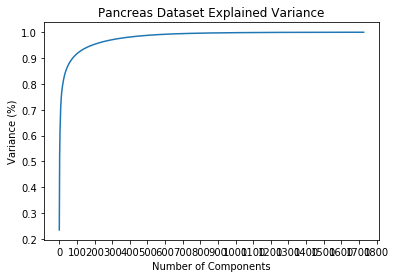

In [22]:
# graph to determine how many principal components should be selected for PCA of first data set

#Fitting the PCA algorithm with our Data
pca = PCA().fit(normalized_pancreas_t)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.xticks([0,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800])
plt.ylabel('Variance (%)') #for each component
plt.title('Pancreas Dataset Explained Variance')
plt.show()

# Plot shows that we could do PCA with 100 principal components (could explain 95% of variance)


In [23]:
pca_2 = PCA(n_components=100)
#n_components < min(n_samples, n_features) = min(1728, 20148)

In [24]:
principalComponents = pca_2.fit_transform(normalized_pancreas_t)

In [25]:
PCs_df = pd.DataFrame(data = principalComponents
             , columns = ['pc 1', 'pc 2','pc 3','pc 4','pc 5','pc 6','pc 7','pc 8','pc 9','pc 10',
                         'pc 11', 'pc 12','pc 13','pc 14','pc 15','pc 16','pc 17','pc 18','pc 19','pc 20',
                         'pc 21', 'pc 22','pc 23','pc 24','pc 25','pc 26','pc 27','pc 28','pc 29','pc 30',
                         'pc 31', 'pc 32','pc 33','pc 34','pc 35','pc 36','pc 37','pc 38','pc 39','pc 40',
                         'pc 41', 'pc 42','pc 43','pc 44','pc 45','pc 46','pc 47','pc 48','pc 49','pc 50',
                         'pc 51', 'pc 52','pc 53','pc 54','pc 55','pc 56','pc 57','pc 58','pc 59','pc 60',
                         'pc 61', 'pc 62','pc 63','pc 64','pc 65','pc 66','pc 67','pc 68','pc 69','pc 70',
                         'pc 71', 'pc 72','pc 73','pc 74','pc 75','pc 76','pc 77','pc 78','pc 79','pc 80',
                         'pc 81', 'pc 82','pc 83','pc 84','pc 85','pc 86','pc 87','pc 88','pc 89','pc 90',
                         'pc 91', 'pc 92','pc 93','pc 94','pc 95','pc 96','pc 97','pc 98','pc 99','pc 100'],
                     index = normalized_pancreas_t.index)

In [26]:
PCs_df.head()

,pc 1,pc 2,pc 3,pc 4,pc 5,pc 6,pc 7,pc 8,pc 9,pc 10,...,pc 91,pc 92,pc 93,pc 94,pc 95,pc 96,pc 97,pc 98,pc 99,pc 100
D2ex_1,0.156994,0.784542,0.554350,0.278795,-0.207179,0.048098,-0.664405,0.049699,-0.588340,0.137636,...,-0.001675,0.001083,0.015286,0.040734,0.002891,0.005889,0.038919,-0.009752,-0.005001,0.030468
D2ex_2,-0.640499,0.657802,0.855351,0.008240,0.080879,-0.089288,0.088391,0.121883,0.041606,-0.037418,...,0.028385,-0.005301,0.005010,0.013940,-0.010569,-0.019546,-0.006285,-0.017704,-0.021678,0.008014
D2ex_3,-0.755789,0.562460,0.832342,-0.024037,0.098941,-0.181849,0.096999,0.123103,0.094138,0.030416,...,0.025989,-0.003136,0.005403,-0.020137,-0.003372,-0.004879,0.000338,0.002328,-0.017009,0.002784
D2ex_4,1.955862,1.386718,-0.483587,-0.189978,0.324383,-0.367402,0.492083,0.287630,-0.022230,-0.054754,...,0.074980,-0.036125,-0.035178,0.028100,-0.060830,-0.006515,0.023838,-0.069854,-0.015361,0.065378
D2ex_5,1.536440,0.923801,-0.186987,-0.050182,0.032674,-0.133058,0.152210,0.001114,-0.386332,-0.455715,...,-0.114217,0.141428,-0.194562,-0.103964,0.056717,-0.088704,-0.038563,0.043184,0.048726,0.075699


Variance Threshold to find most variant genes

In [ ]:
# if want to deal with most variant genes

from sklearn.feature_selection import VarianceThreshold

def variance_threshold_selector(data, threshold=0.04): #removes features with a variation below a cutoff
                                                       #we can play around with the threshold 
    selector = VarianceThreshold(threshold)
    selector.fit_transform(data)
    return data[data.columns[selector.get_support(indices=True)]]

topgenes_pancreas_1 = variance_threshold_selector(normalized_pancreas, 0.0005) #contains the features with a variation above the cutoff
topgenes_pancreas_1

In [26]:
# MAY NOT NEED TO DO THIS BECAUSE FUNCTION IN NEXT CELL APPEARS TO DO SCALING
# PCA is effected by scale so you need to scale the features in your data before applying PCA. 
# ^ is from https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60 

from sklearn.preprocessing import StandardScaler
normalized_pancreas_stand = StandardScaler().fit_transform(normalized_pancreas)

In [40]:
topgenes_pancreas_2 = variance_threshold_selector(normalized_pancreas_2, 0.0005) #contains the features with a variation above the cutoff
topgenes_pancreas_2

,D28-1_38,D28-3_41,D28-3_53,D28-4_4,D28-6_87,D29-1_61,D29-2_7,D29-6_74,D31-2_62,D31-4_16,...,D30-2_60,D30-2_71,D30-3_7,D30-4_82,D30-5_52,D30-6_28,D30-6_48,D30-7_88,D30-7_90,D30-8_69
A1BG-AS1__chr19,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
A1BG__chr19,0.000000,0.003162,0.000000,0.000000,0.000000,0.002729,0.000000,0.0,0.000000,0.002667,...,0.000000,0.002524,0.002280,0.000000,0.0,0.001740,0.000000,0.000000,0.000000,0.000000
A1CF__chr10,0.009015,0.015780,0.000000,0.003802,0.025757,0.000000,0.000000,0.0,0.000000,0.000000,...,0.005089,0.015780,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.002524
A2M-AS1__chr12,0.000000,0.000627,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
A2ML1__chr12,0.000627,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A__chr1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
ZYG11B__chr1,0.005089,0.015090,0.032471,0.008354,0.019272,0.016535,0.010606,0.0,0.000000,0.016160,...,0.011687,0.025024,0.006867,0.003162,0.0,0.007001,0.008696,0.006562,0.022901,0.005089
ZYX__chr7,0.000627,0.003802,0.013806,0.004444,0.001890,0.044996,0.031943,0.0,0.003188,0.027150,...,0.004444,0.001890,0.013817,0.003162,0.0,0.036164,0.011618,0.013150,0.000000,0.001890
ZZEF1__chr17,0.001257,0.007040,0.000000,0.002524,0.014404,0.013752,0.000000,0.0,0.006389,0.024385,...,0.011015,0.018568,0.000000,0.001890,0.0,0.001740,0.002887,0.000000,0.007604,0.001257


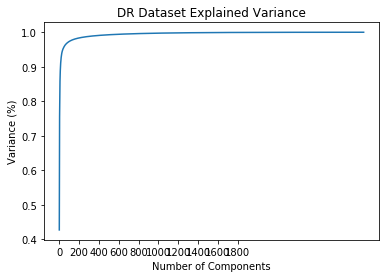

In [54]:
# graph to determine how many principal components should be selected for PCA of second data set

#Fitting the PCA algorithm with our Data
pca = PCA().fit(normalized_pancreas_2)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.xticks([0,200,400,600,800,1000,1200,1400,1600,1800])
plt.ylabel('Variance (%)') #for each component
plt.title('DR Dataset Explained Variance')
plt.show()

# Plot shows that we could do PCA with 100 principal components (could explain 98% of variance)
# It says the number of PCs should be = min(n_samples, n_features) in the class notes though..